# Population vs. Median Home Prices
#### *Linear Regression with Single Variable*

### Load and parse the data

In [3]:
spark

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v2.4.4 
 Master 
 local[8] 
 AppName 
 Databricks Shell

In [4]:
# Use the Spark CSV datasource with options specifying:
#  - First line of file is a header
#  - Automatically infer the schema of the data
data = spark.read.csv("/databricks-datasets/samples/population-vs-price/data_geo.csv", header="true", inferSchema="true")
data.cache()  # Cache data for faster reuse
data.count()

Out[1]: 294

In [5]:
display(data)

2014 rank,City,State,State Code,2014 Population estimate,2015 median sales price
101,Birmingham,Alabama,AL,212247,162.9
125,Huntsville,Alabama,AL,188226,157.7
122,Mobile,Alabama,AL,194675,122.5
114,Montgomery,Alabama,AL,200481,129.0
64,Anchorage[19],Alaska,AK,301010,null
78,Chandler,Arizona,AZ,254276,null
86,Gilbert[20],Arizona,AZ,239277,null
88,Glendale,Arizona,AZ,237517,null
38,Mesa,Arizona,AZ,464704,null
148,Peoria,Arizona,AZ,166934,null


In [6]:
data = data.dropna()  # drop rows with missing values
data.count()

Out[2]: 109

In [7]:
from pyspark.sql.functions import col

exprs = [col(column).alias(column.replace(' ', '_')) for column in data.columns]

vdata = data.select(*exprs).selectExpr("2014_Population_estimate as population", "2015_median_sales_price as label")
display(vdata)

population,label
212247,162.9
188226,157.7
194675,122.5
200481,129.0
1537058,206.1
527972,178.1
197706,131.8
346997,685.7
3928864,434.7
319504,281.0


In [8]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler

stages = []
assembler = VectorAssembler(inputCols=["population"], outputCol="features")
stages += [assembler]
pipeline = Pipeline(stages=stages)
pipelineModel = pipeline.fit(vdata)
dataset = pipelineModel.transform(vdata)
# Keep relevant columns
selectedcols = ["features", "label"]
display(dataset.select(selectedcols))

features,label
"List(1, 1, List(), List(212247.0))",162.9
"List(1, 1, List(), List(188226.0))",157.7
"List(1, 1, List(), List(194675.0))",122.5
"List(1, 1, List(), List(200481.0))",129.0
"List(1, 1, List(), List(1537058.0))",206.1
"List(1, 1, List(), List(527972.0))",178.1
"List(1, 1, List(), List(197706.0))",131.8
"List(1, 1, List(), List(346997.0))",685.7
"List(1, 1, List(), List(3928864.0))",434.7
"List(1, 1, List(), List(319504.0))",281.0


## Scatterplot of the data using ggplot

In [10]:
import numpy as np
from pandas import *
# from ggplot import *

x = dataset.rdd.map(lambda p: (p.features[0])).collect()
y = dataset.rdd.map(lambda p: (p.label)).collect()

pydf = DataFrame({'pop':x,'price':y})
p = ggplot(pydf, aes('pop','price')) + \
    geom_point(color='blue') + \
    scale_x_log10() + scale_y_log10()
display(p)

--------------------------------------------------------------------------- 
 NameError Traceback (most recent call last)
 <command-2569025227607656> in <module> 
 3 # from ggplot import * 
 4 
 ----> 5 x = dataset . rdd . map ( lambda p : ( p . features [ 0 ] ) ) . collect ( ) 
 6 y = dataset . rdd . map ( lambda p : ( p . label ) ) . collect ( ) 
 7 

 NameError : name 'dataset' is not defined

## Linear Regression

**Goal**
* Predict y = 2015 Median Housing Price
* Using feature x = 2014 Population Estimate

**References**
* [MLlib LinearRegression user guide](http://spark.apache.org/docs/latest/ml-classification-regression.html#linear-regression)
* [PySpark LinearRegression API](http://spark.apache.org/docs/latest/api/python/pyspark.ml.html#pyspark.ml.regression.LinearRegression)

In [12]:
# Import LinearRegression class
from pyspark.ml.regression import LinearRegression
# Define LinearRegression algorithm
lr = LinearRegression()

In [13]:
# Fit 2 models, using different regularization parameters
modelA = lr.fit(dataset, {lr.regParam:0.0})
modelB = lr.fit(dataset, {lr.regParam:100.0})
print(">>>> ModelA intercept: %r, coefficient: %r" % (modelA.intercept, modelA.coefficients[0]))
print(">>>> ModelB intercept: %r, coefficient: %r" % (modelB.intercept, modelB.coefficients[0]))

--------------------------------------------------------------------------- 
 NameError Traceback (most recent call last)
 <command-2569025227607659> in <module> 
 1 # Fit 2 models, using different regularization parameters 
 ----> 2 modelA = lr . fit ( dataset , { lr . regParam : 0.0 } ) 
 3 modelB = lr . fit ( dataset , { lr . regParam : 100.0 } ) 
 4 print ( ">>>> ModelA intercept: %r, coefficient: %r" % ( modelA . intercept , modelA . coefficients [ 0 ] ) ) 
 5 print ( ">>>> ModelB intercept: %r, coefficient: %r" % ( modelB . intercept , modelB . coefficients [ 0 ] ) ) 

 NameError : name 'lr' is not defined

## Make predictions

Calling `transform()` on data adds a new column of predictions.

In [15]:
# Make predictions
predictionsA = modelA.transform(dataset)
display(predictionsA)

population,label,features,prediction
212247,162.9,"List(1, 1, List(), List(212247.0))",199.3167659584664
188226,157.7,"List(1, 1, List(), List(188226.0))",198.40882267887193
194675,122.5,"List(1, 1, List(), List(194675.0))",198.65258131548592
200481,129.0,"List(1, 1, List(), List(200481.0))",198.87203590444247
1537058,206.1,"List(1, 1, List(), List(1537058.0))",249.39183544694856
527972,178.1,"List(1, 1, List(), List(527972.0))",211.25050693302884
197706,131.8,"List(1, 1, List(), List(197706.0))",198.7671467407576
346997,685.7,"List(1, 1, List(), List(346997.0))",204.4100325554172
3928864,434.7,"List(1, 1, List(), List(3928864.0))",339.79707185649573
319504,281.0,"List(1, 1, List(), List(319504.0))",203.37085497805194


In [16]:
predictionsB = modelB.transform(dataset)
display(predictionsB)

population,label,features,prediction
212247,162.9,"List(1, 1, List(), List(212247.0))",204.43640360159205
188226,157.7,"List(1, 1, List(), List(188226.0))",203.91746594049368
194675,122.5,"List(1, 1, List(), List(194675.0))",204.05678690866418
200481,129.0,"List(1, 1, List(), List(200481.0))",204.18221682666663
1537058,206.1,"List(1, 1, List(), List(1537058.0))",233.05695735611485
527972,178.1,"List(1, 1, List(), List(527972.0))",211.25716847608865
197706,131.8,"List(1, 1, List(), List(197706.0))",204.12226711559933
346997,685.7,"List(1, 1, List(), List(346997.0))",207.34747515702293
3928864,434.7,"List(1, 1, List(), List(3928864.0))",284.72833704226645
319504,281.0,"List(1, 1, List(), List(319504.0))",206.7535301457171


## Evaluate the Model
#### Predicted vs. True label

In [18]:
from pyspark.ml.evaluation import RegressionEvaluator
evaluator = RegressionEvaluator(metricName="rmse")
RMSE = evaluator.evaluate(predictionsA)
print("ModelA: Root Mean Squared Error = " + str(RMSE))

ModelA: Root Mean Squared Error = 128.60202684284758

In [19]:
predictionsB = modelB.transform(dataset)
RMSE = evaluator.evaluate(predictionsB)
print("ModelB: Root Mean Squared Error = " + str(RMSE))

ModelB: Root Mean Squared Error = 129.49630019270606

## Plot residuals versus fitted values

In [21]:
display(modelA,dataset)

fitted values,residuals
199.3167659584664,-36.416765958466385
198.40882267887193,-40.70882267887194
198.65258131548592,-76.15258131548592
198.87203590444247,-69.87203590444247
211.25050693302884,-33.15050693302885
198.7671467407576,-66.96714674075758
204.4100325554172,481.2899674445829
203.37085497805194,77.62914502194806
209.63377749220228,66.16622250779773
243.49577931936597,266.80422068063405


# Linear Regression Plots

In [23]:
import numpy as np
from pandas import *
from ggplot import *

pop = dataset.rdd.map(lambda p: (p.features[0])).collect()
price = dataset.rdd.map(lambda p: (p.label)).collect()
predA = predictionsA.select("prediction").rdd.map(lambda r: r[0]).collect()
predB = predictionsB.select("prediction").rdd.map(lambda r: r[0]).collect()

pydf = DataFrame({'pop':pop,'price':price,'predA':predA, 'predB':predB})

## View the Python Pandas DataFrame (pydf)

In [25]:
pydf

Out[ 15 ]: 
 pop predA predB price
0 212247.0 199.316766 204.436404 162.9
1 188226.0 198.408823 203.917466 157.7
2 194675.0 198.652581 204.056787 122.5
3 200481.0 198.872036 204.182217 129.0
4 1537058.0 249.391835 233.056957 206.1
5 527972.0 211.250507 211.257168 178.1
6 197706.0 198.767147 204.122267 131.8
7 346997.0 204.410033 207.347475 685.7
8 3928864.0 339.797072 284.728337 434.7
9 319504.0 203.370855 206.753530 281.0
10 485199.0 209.633777 210.333122 275.8
11 1381069.0 243.495779 229.687049 510.3
12 852469.0 223.515811 218.267439 748.3
13 1015785.0 229.688812 221.795636 900.0
14 105112.0 195.267288 202.121913 442.2
15 445830.0 208.145712 209.482614 220.1
16 663862.0 216.386863 214.192868 338.1
17 147612.0 196.873699 203.040061 342.7
18 124705.0 196.007862 202.545190 202.6
19 130282.0 196.218661 202.665673 205.1
20 658893.0 216.199045 214.085520 367.8
21 169854.0 197.714400 203.520566 208.0
22 128460.0 196.149794 202.626311 169.9
23 853382.0 223.550321 218.287163 182.5
24 102346.0 195.162739 202.062157 136.0
25 430332.0 207.559920 209.147803 269.1
26 105838.0 195.294730 202.137597 145.0
27 174110.0 197.875268 203.612511 172.0
28 188107.0 198.404325 203.914895 170.5
29 358699.0 204.852344 207.600279 156.0
.. ... ... ... ...
79 141003.0 196.623893 202.897284 107.2
80 281031.0 201.916656 205.922379 83.8
81 399682.0 206.401415 208.485656 145.1
82 160561.0 197.363144 203.319805 211.3
83 619360.0 214.704781 213.231469 289.4
84 161637.0 197.403814 203.343050 193.9
85 119104.0 195.796156 202.424189 162.7
86 1560297.0 250.270221 233.559001 204.9
87 179154.0 198.065920 203.721479 233.3
88 168586.0 197.666472 203.493173 159.5
89 173778.0 197.862719 203.605339 143.6
90 184281.0 198.259710 203.832240 149.2
91 656861.0 216.122240 214.041622 132.1
92 644014.0 215.636650 213.764082 186.4
93 120958.0 195.866234 202.464242 145.7
94 197254.0 198.750062 204.112502 144.4
95 912791.0 225.795856 219.570606 249.1
96 117585.0 195.738741 202.391373 133.3
97 320434.0 203.406007 206.773621 172.9
98 1281047.0 239.715158 227.526224 192.5
99 679036.0 216.960408 214.520680 138.4
100 2239558.0 275.944858 248.233416 200.3
101 1436697.0 245.598401 230.888809 184.7
102 190884.0 198.509289 203.974888 243.3
103 217853.0 199.528661 204.557513 212.5
104 450980.0 208.340371 209.593872 190.0
105 668342.0 216.556198 214.289652 352.4
106 212052.0 199.309395 204.432191 180.2
107 245691.0 200.580879 205.158911 226.2
108 599642.0 213.959482 212.805491 195.4

[109 rows x 4 columns]

## ggplot figure
With the Pandas DataFrame (pydf), use ggplot and display the scatterplot and the two regression models

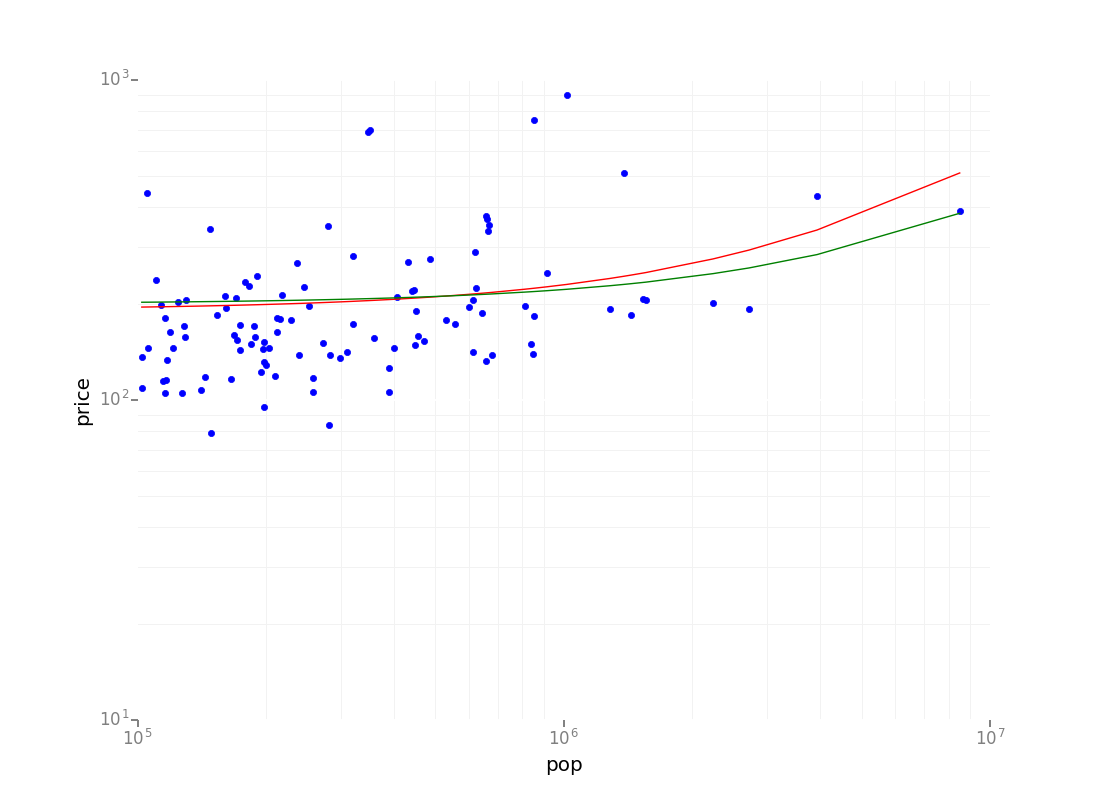

In [27]:
p = ggplot(pydf, aes('pop','price')) + \
    geom_point(color='blue') + \
    geom_line(pydf, aes('pop','predA'), color='red') + \
    geom_line(pydf, aes('pop','predB'), color='green') + \
    scale_x_log10() + scale_y_log10()
display(p)